# Part IA Computing Examples Paper 2 Guidance

This notebook provides some guidance for completing Examples Paper 2. It includes:

1. Reading image files as NumPy array (matrices) and displaying
1. Loading/retrieving sound files and converting signals to NumPy arrays

Import modules that are used for both cases.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import urllib

## Reading images as matrices and displaying

We first import the [Pillow](https://pillow.readthedocs.io/) imaging module.

In [2]:
import PIL

Fetch, open and display a Baker Building image:

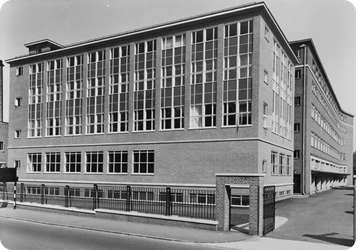

In [3]:
urllib.request.urlretrieve("https://github.com/CambridgeEngineering/PartIA-Computing-Examples-Papers/raw/main/images/southwing.png", 
                           "baker.png")
A = PIL.Image.open("baker.png")
display(A)

Convert the image to a matrix (NumPy array) and 'display' the array:

Image array shape (pixels): (250, 359)


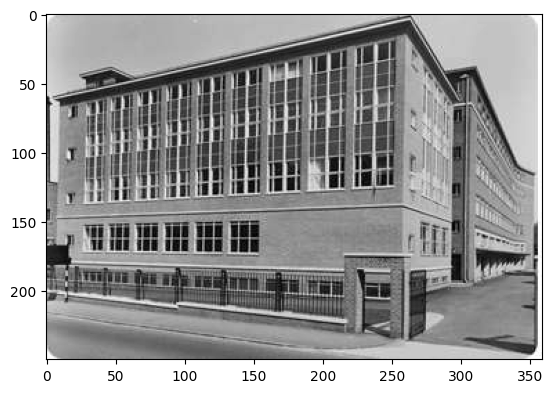

In [4]:
A = np.asarray(A)
plt.imshow(A, cmap='gray');
print("Image array shape (pixels): {}".format(A.shape))

## Fetching and manipulating sound files

Manipulating sound clips is demonstrated by first constructing a simple harmonic signal with two frequencies, and then by retrieving and manipulating a music recording.

The below modules are required for manipulating and playing sound files.

In [5]:
import scipy.io.wavfile
from IPython.display import Audio

### Harmonic wave

To illustrate sound signal processing and the discrete Fourier transform, we consider a wave
signal of the form:

$$
x(t) = \sin(\omega_{0} t) +  \sin(\omega_{1} t).
$$

We will create a signal with $\omega_{0} = 240$ Hz and $\omega_{1} = 440$ Hz over a time period of $1.5$ s, sampled at a frequency of $44100$ Hz (this is a common sampling frequency - it is the frequency used by compact discs).

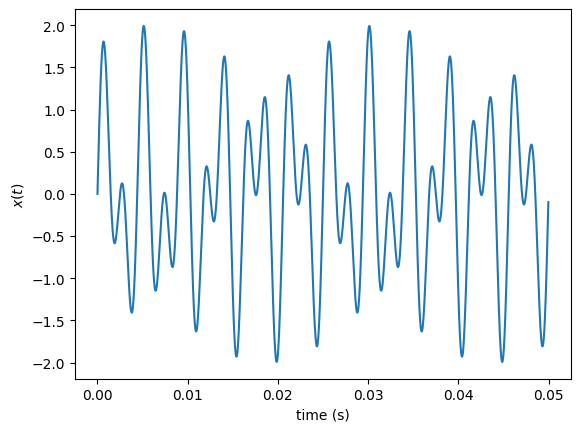

In [6]:
# Sampling frequency
fs = 44100

# Time interval (seconds)
T = 1.5    

# Time points (0 to T, with T*fs points)
t = np.linspace(0, T, int(T*fs), endpoint=False)

# Signal frequencies
omega0, omega1  = 2*np.pi*240, 2*np.pi*440

# Create signal
x = np.sin(omega0*t) + np.sin(omega1*t)

# Plot signal over first 0.05 s
n = int(0.05*fs)
plt.plot(t[:n], x[:n])
plt.xlabel('time (s)')
plt.ylabel('$x(t)$');

We can play this signal:

In [7]:
Audio(x, rate=fs)

#### Fourier transform

The Fourier transform allows us to take a signal $x(t)$ and 'decompose' it by frequency. Performing a discrete Fourier transform of the signal:

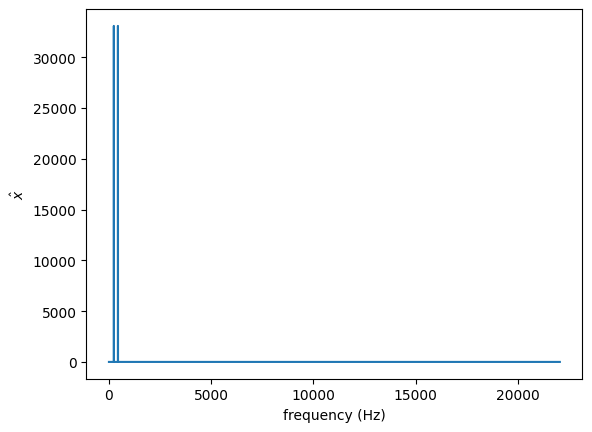

In [8]:
# Perform a Fourier transform of the signal (signal is real, so we can use the 'real' version)
xf = np.fft.rfft(x)

# Create frequency axis
freq = np.linspace(0.0, fs/2, len(xf))

# Plot Fourier coefficients against frequency. Fourier coefficients are complex, so
# we take the modulus.
plt.plot(freq, np.abs(xf))
plt.xlabel('frequency (Hz)')
plt.ylabel('$\hat{x}$');

We see two spikes at the frequencies $\omega_{0}$ and $\omega_{1}$. Zooming in, we can see this more clearly: 

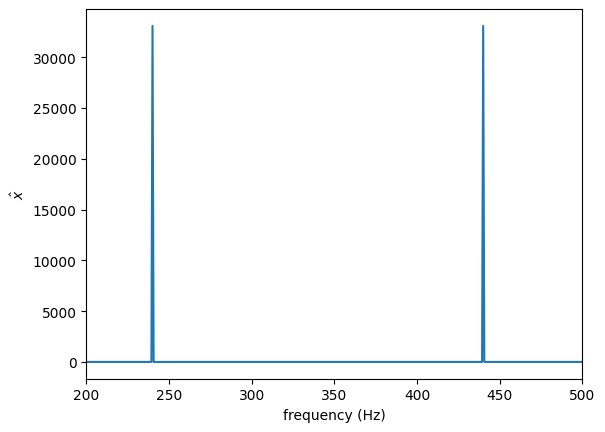

In [9]:
plt.plot(freq, np.abs(xf))
plt.xlabel('frequency (Hz)')
plt.ylabel('$\hat{x}$')
plt.xlim(200, 500);

#### Inverse Fourier transform

The inverse transform takes us back to the time domain. However, before we do this we will eliminate certain frequencies from the signal. We will eliminate all frequencies below 250 Hz:

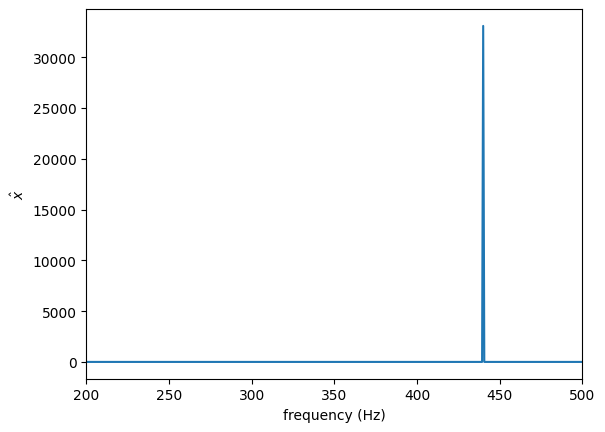

In [10]:
# Copy transformed problem
xf_filtered = xf.copy()

# Cut off requencies below 250 Hz
cutoff_freq = 250
n_cut = int(2*cutoff_freq*len(xf_filtered)/fs)
xf_filtered[:n_cut] = 0.0

plt.plot(freq, np.abs(xf_filtered))
plt.xlabel('frequency (Hz)')
plt.ylabel('$\hat{x}$')
plt.xlim(200, 500);

The shows that the frequency at 240 Hz has been eliminated.

Performing the inverse transform and playing the signal, the sound has clearly changed:

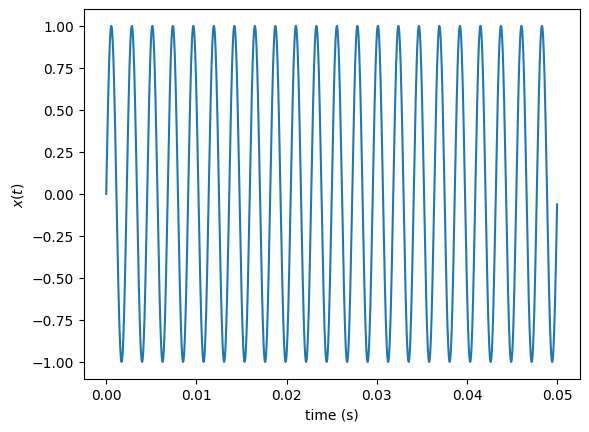

In [11]:
# Perform inverse transfiorm
x_filtered = np.fft.irfft(xf_filtered)

# Plot signal over first 0.05 s
n = int(0.05*fs)
plt.plot(t[:n], x_filtered[:n])
plt.xlabel('time (s)')
plt.ylabel('$x(t)$')

Audio(x_filtered, rate=fs)

### Piano track

We now fetch a piano sound track (WAV file) over the Internet and play it:

In [12]:
url = "https://github.com/CambridgeEngineering/PartIA-Computing-Examples-Papers/raw/master/sound/piano1.wav"
Audio(url)

HTTPError: HTTP Error 404: Not Found

To process the track, we need to read it as a NumPy array:

In [ ]:
# Fetch sound file
local_filename, headers = urllib.request.urlretrieve(url)

# Read frequency and data array for sound track
fs, x = scipy.io.wavfile.read(local_filename) 

# If we have a stero track (left and right channels), take just the first channel
if len(x.shape) > 1:
    x = x[:, 0]

# Check that it plays
Audio(x, rate=fs)

We can plot the signal:

In [ ]:
# Time points (0 to T, with T*fs points)
t = np.linspace(0, len(x)/fs, len(x), endpoint=False)

# Plot signal
plt.plot(t, x)
plt.xlabel('time (s)')
plt.ylabel('signal');

#### Fourier transform

We perform a Fourier transform of the signal to decompose it into its frequency components, and plot with a log scale in the signal axis:

In [ ]:
# Perform discrete Fourier transform (real signal)
xf = np.fft.rfft(x)

# Create frequency axis for plotting
freq = np.linspace(0.0, fs/2, len(xf))

plt.semilogy(freq, np.abs(xf))
plt.xlabel('frequency (Hz)')
plt.ylabel('$\hat{x}$');

#### Filtering and inverse transform

We can filter out selcted frequency ranges:

In [ ]:
# Create copy og transformed signal
xf_filtered = xf.copy()

# Cut-off frequencies (Hz)
cutoff_freq_low = 1200
cutoff_freq_high = 1500

# Cut-off indices in transform array
n_cut_low = int(2*cutoff_freq_low*len(xf_filtered)/fs)
n_cut_high = int(2*cutoff_freq_high*len(xf_filtered)/fs)

# Remove low and high frequencies
xf_filtered[:n_cut_low] = 0.0
xf_filtered[n_cut_high:] = 0.0

# Plot filtered transform 
plt.semilogy(freq, np.abs(xf_filtered))
plt.xlabel('frequency (Hz)')
plt.ylabel('$\hat{x}$');

It is clear from the plot that the high and low frequencies have been eliminated.

We now transform the filtered signal to the time domain so we can listen to it:

In [ ]:
# Perform inverse transform on filtered signal
x_filtered = np.fft.irfft(xf_filtered)

# Plot signal
plt.plot(t, x_filtered)
plt.xlabel('Time (s)')
plt.ylabel('signal');

Play filtered sound signal:

In [ ]:
Audio(x_filtered, rate=fs)

---
## Copyright and license

© Copyright 2017-2023 Garth N. Wells (<gnw20@cam.ac.uk>)

### Notebook text 

This work is licensed under the Creative Commons
Attribution-ShareAlike 4.0 International License. To view a copy of
this license, visit <https://creativecommons.org/licenses/by-sa/4.0/>.

### Notebook code

This work is licensed under the MIT License. To view a copy of
this license, visit <https://opensource.org/licenses/MIT>.